<a href="https://colab.research.google.com/github/bargida/Workshops/blob/main/Simple%2BLinear%2BRegression%2Bwith%2Bsklearn%2B_%2BExercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple linear regression - Exercise

You are given a real estate dataset.

Real estate is one of those examples that every regression course goes through as it is extremely easy to understand and there is a (almost always) certain causal relationship to be found.

The data is located in the file: 'real_estate_price_size.csv'.

You are expected to create a simple linear regression (similar to the one in the lecture), using the new data.

Apart from that, please:
-  Create a scatter plot (with or without a regression line)
-  Calculate the R-squared
-  Display the intercept and coefficient(s)
-  Using the model make a prediction about an apartment with size 750 sq.ft.

Note: In this exercise, the dependent variable is 'price', while the independent variable is 'size'.

Good luck!

## Import the relevant libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.linear_model import LinearRegression

## Load the data

In [12]:
# This cell should be run after the import cell
data = pd.read_csv('real_estate_price_size.csv')
data.head()

,price,size
0,234314.144,643.09
1,228581.528,656.22
2,281626.336,487.29
3,401255.608,1504.75
4,458674.256,1275.46


## Create the regression

### Declare the dependent and the independent variables

In [13]:
x = data['size']
y = data['price']

### Explore the data

In [14]:
x.shape

(100,)

### Transform the inputs into a matrix (2D object)

In [16]:
x_matrix = x.values.reshape(-1,1)
x_matrix.shape

(100, 1)

### Regression itself

In [17]:
reg = LinearRegression()
reg.fit(x_matrix,y)

LinearRegression()

### Calculate the R-squared

In [18]:
reg.score(x_matrix,y)

0.7447391865847586

### Find the intercept

In [19]:
reg.intercept_

np.float64(101912.60180122897)

### Find the coefficients

In [20]:
reg.coef_

array([223.17874259])

### Making predictions

You find an apartment online with a size of 750 sq.ft.

All else equal what should be its price according to the model?

In [23]:
reg.predict([[750]])

array([269296.65874718])

In [24]:
new_data = pd.DataFrame(data=[1740,2230],columns=['size'])
new_data

,size
0,1740
1,2230


In [26]:
reg.predict(new_data)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([490243.61391585, 599601.1977872 ])

In [27]:
new_data['predicted price'] = reg.predict(new_data)
new_data

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


,size,predicted price
0,1740,490243.613916
1,2230,599601.197787


Text(0, 0.5, 'Price')

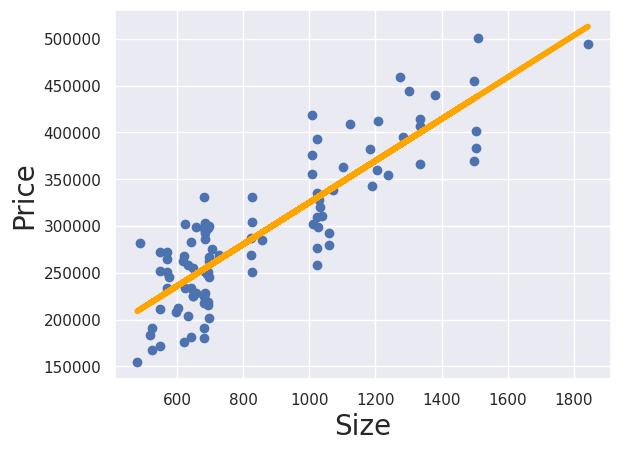

In [28]:
plt.scatter(x,y)
yhat = reg.coef_*x_matrix + reg.intercept_
fig = plt.plot(x,yhat,lw=4,c='orange',label='regression line')
plt.xlabel('Size',fontsize=20)
plt.ylabel('Price',fontsize=20)